CLUSTERING ANALYSIS

Understanding and Implementing K-Means, Hierarchical, and DBSCAN Algorithms

Objective:
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.
Datasets :
Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the dataset
Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.
•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.
•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

Visualization:
Visualize the clustering results using scatter plots or other suitable visualization techniques.
Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.
Evaluation and Performance Metrics:
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


Data Preprocessing:

In [1]:
import pandas as pd
df=pd.read_csv("/content/EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:

df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [4]:
df.shape

(3999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [8]:
# Step 1: Import Libraries
# -----------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
# -----------------------------------
# Step 2: Load Dataset
# -----------------------------------
df = pd.read_csv("/content/EastWestAirlines.csv")  # change path if needed
print(df.head())
print(df.info())

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 en

In [11]:
# ---------- Preprocessing ----------
# Separate numeric & non-numeric
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

In [12]:

# Missing values: numeric -> median, categorical -> mode
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
for c in cat_cols:
    if df[c].isnull().any():
        df[c] = df[c].fillna(df[c].mode().iloc[0])

In [13]:
# Work on numeric data for clustering
data = df[num_cols].copy()


In [14]:
# Remove outliers using IQR (per numeric column)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data_clean = data[mask].reset_index(drop=True)
df_clean = df.loc[data_clean.index].reset_index(drop=True)

In [15]:
# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean)

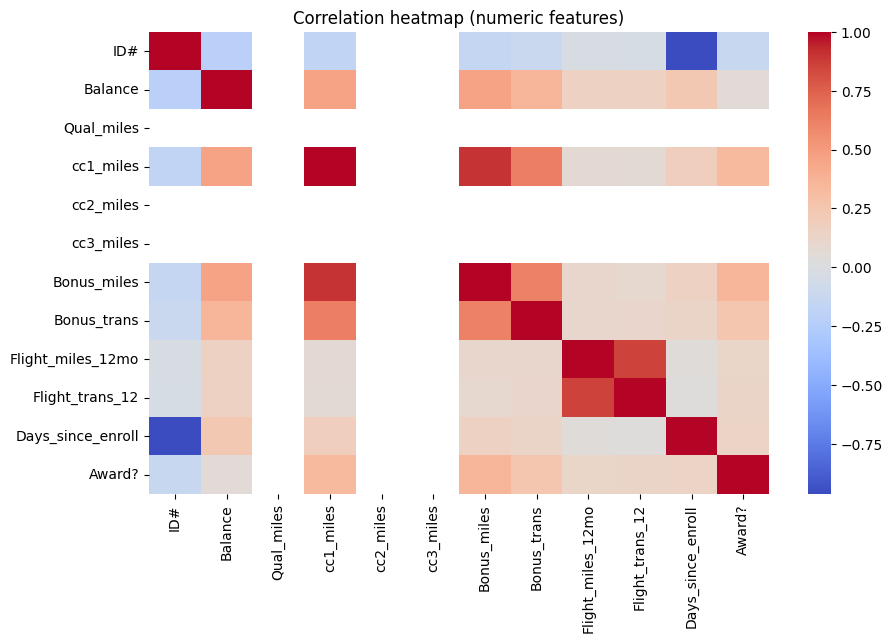

In [16]:
# ---------- EDA ----------
plt.figure(figsize=(10,6))
sns.heatmap(data_clean.corr(), cmap="coolwarm")
plt.title("Correlation heatmap (numeric features)")
plt.show()


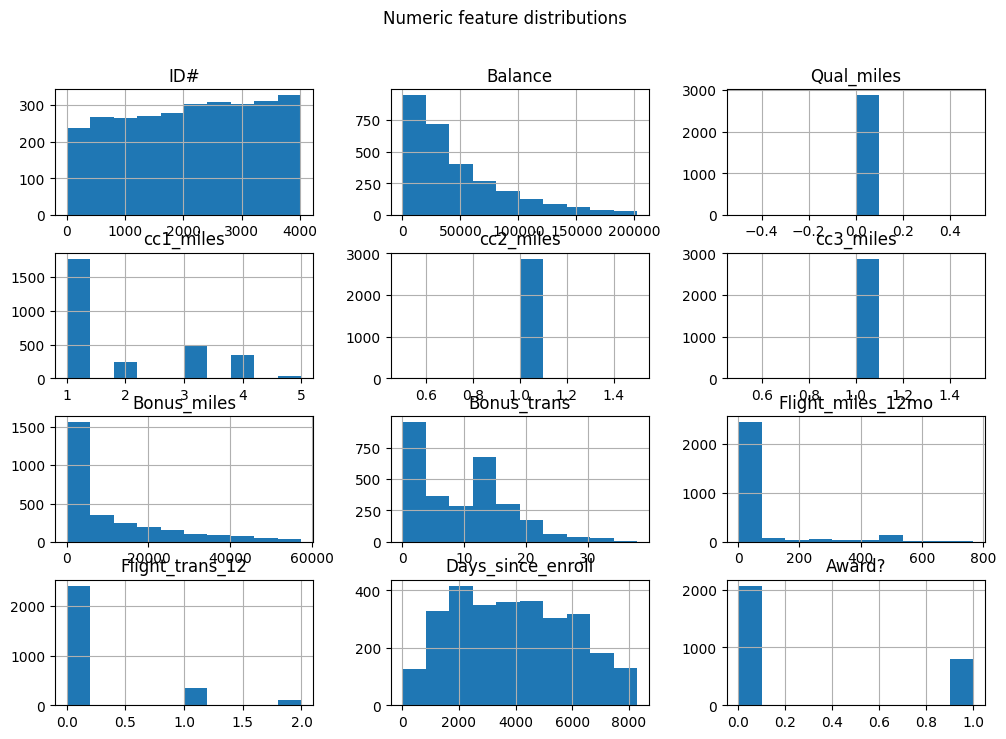

In [17]:
data_clean.hist(figsize=(12,8))
plt.suptitle("Numeric feature distributions")
plt.show()

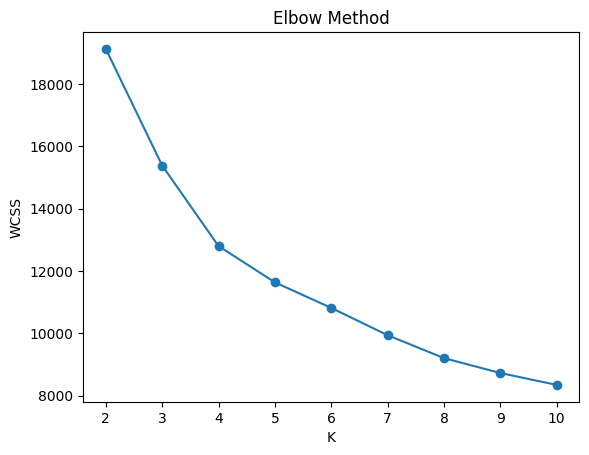

In [18]:
# ---------- K-Means: Elbow + Fit ----------
wcss = []
K_range = range(2,11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

plt.plot(K_range, wcss, marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [19]:
# Choose K (replace 5 with the elbow result)
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
df_clean['KMeans_Cluster'] = kmeans_labels
print("KMeans silhouette:", silhouette_score(scaled_data, kmeans_labels))



KMeans silhouette: 0.26759204256440583


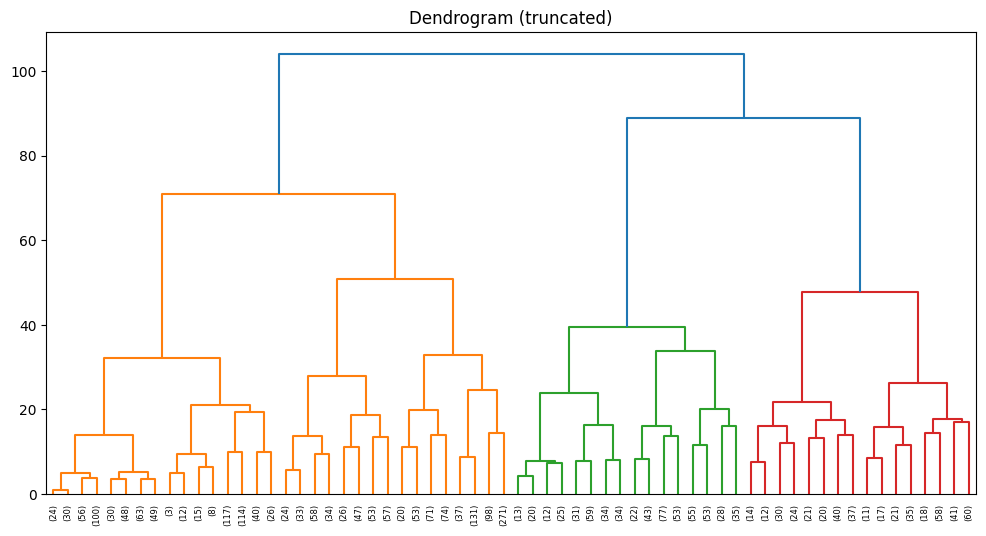

In [20]:
# ---------- Hierarchical Clustering ----------
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrogram (truncated)")
plt.show()

In [21]:
# choose number of clusters (e.g., 5)
h_labels = fcluster(linked, 5, criterion='maxclust')
df_clean['Hierarchical_Cluster'] = h_labels
print("Hierarchical silhouette:", silhouette_score(scaled_data, h_labels))

Hierarchical silhouette: 0.22983247573804177


In [22]:
dbscan = DBSCAN(eps=0.6, min_samples=5)   # tune these
db_labels = dbscan.fit_predict(scaled_data)
df_clean['DBSCAN_Cluster'] = db_labels
unique_db = len(set(db_labels))
if unique_db > 1 and (len(set(db_labels)) - (1 if -1 in db_labels else 0)) > 0:
    print("DBSCAN silhouette:", silhouette_score(scaled_data, db_labels))
else:
    print("DBSCAN produced a single cluster or only noise; adjust eps/min_samples")


DBSCAN silhouette: -0.14130770930432526


In [23]:
# ---------- Visualizations (first two principal dims) ----------
# If more than 2 dims, use PCA for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(scaled_data)


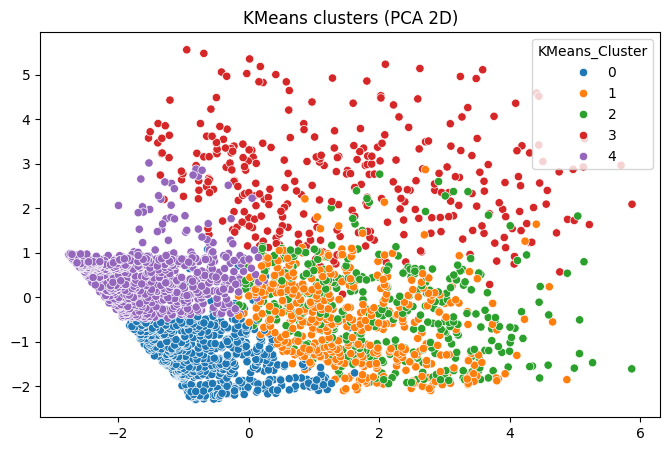

In [24]:

plt.figure(figsize=(8,5))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=df_clean['KMeans_Cluster'], palette='tab10', legend='full')
plt.title("KMeans clusters (PCA 2D)")
plt.show()

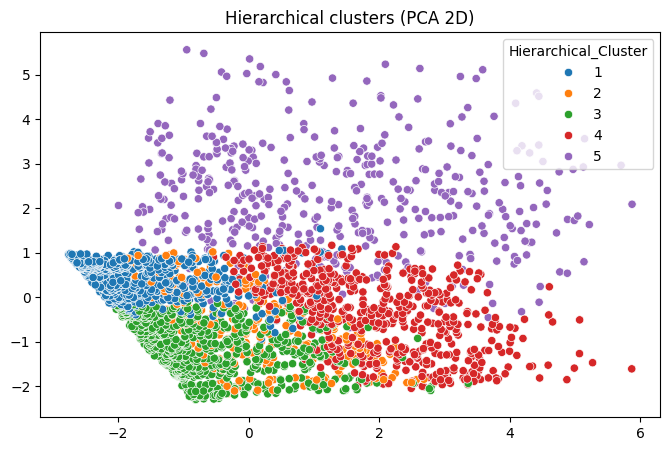

In [25]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=df_clean['Hierarchical_Cluster'], palette='tab10', legend='full')
plt.title("Hierarchical clusters (PCA 2D)")
plt.show()

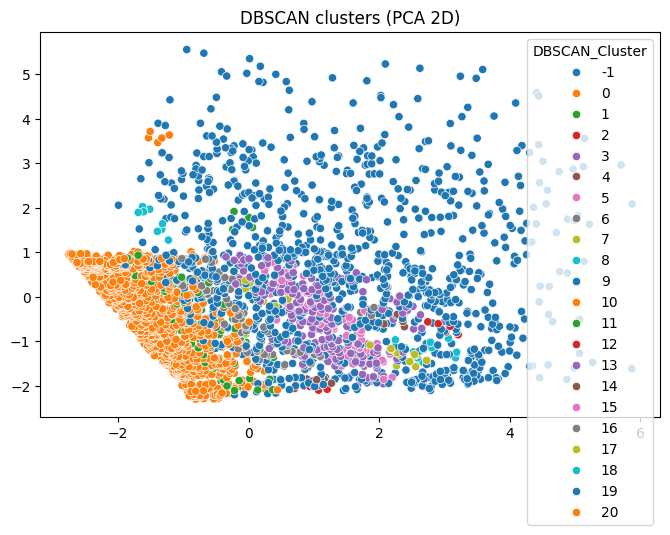

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=proj[:,0], y=proj[:,1], hue=df_clean['DBSCAN_Cluster'], palette='tab10', legend='full')
plt.title("DBSCAN clusters (PCA 2D)")
plt.show()


In [27]:
# ---------- Cluster summaries / insights ----------
print("\nKMeans cluster centers (scaled-space):\n", kmeans.cluster_centers_)
print("\nKMeans cluster means (original features):")
print(df_clean.groupby('KMeans_Cluster')[num_cols].mean())

print("\nHierarchical cluster means:")
print(df_clean.groupby('Hierarchical_Cluster')[num_cols].mean())

print("\nDBSCAN cluster counts:")
print(df_clean['DBSCAN_Cluster'].value_counts())


KMeans cluster centers (scaled-space):
 [[-0.86751865 -0.36396142  0.         -0.65500955  0.          0.
  -0.60971779 -0.53462066 -0.34427637 -0.32914859  0.84830339 -0.25639551]
 [-0.28258825  1.12421013  0.          1.09702574  0.          0.
   0.90445391  0.83772619 -0.33177421 -0.2971046   0.28508466 -0.55983078]
 [-0.27770394  0.10846733  0.          1.21484831  0.          0.
   1.17344694  0.88160864 -0.29143748 -0.22217235  0.29981693  1.60495191]
 [-0.08091869  0.43949721  0.          0.17916232  0.          0.
   0.23429581  0.28318628  2.57520897  2.34081115  0.09406599  0.35126283]
 [ 0.93610151 -0.46385637  0.         -0.62742263  0.          0.
  -0.56983014 -0.48321456 -0.3366217  -0.31466362 -0.93705274 -0.36177463]]

KMeans cluster means (original features):
                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0                723.196653  100485.210600  136.42